In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Data: Student_ID and Exam_Score
scores = np.array([93, 83, 69, 62, 75, 93, 73, 77, 65, 65,
                   78, 90, 94, 78, 57, 76, 56, 78, 84, 92])



In [3]:
# 1. Basic Stats
mean_score = np.mean(scores)
# Population variance: divide by N
pop_var = np.var(scores, ddof=0)
# Sample variance: divide by N-1
samp_var = np.var(scores, ddof=1)
std_score = np.sqrt(samp_var)

print("1. Basic Statistics:")
print(f"Mean Score: {mean_score:.2f}")
print(f"Population Variance (ddof=0): {pop_var:.2f}")
print(f"Sample Variance (ddof=1): {samp_var:.2f}")
print(f"Standard Deviation (sample): {std_score:.2f}")

print("\nComparison:")
print("Population variance divides by N, sample variance divides by N-1 (unbiased estimator).")
print("Sample variance is slightly larger as expected.")

1. Basic Statistics:
Mean Score: 76.90
Population Variance (ddof=0): 136.09
Sample Variance (ddof=1): 143.25
Standard Deviation (sample): 11.97

Comparison:
Population variance divides by N, sample variance divides by N-1 (unbiased estimator).
Sample variance is slightly larger as expected.


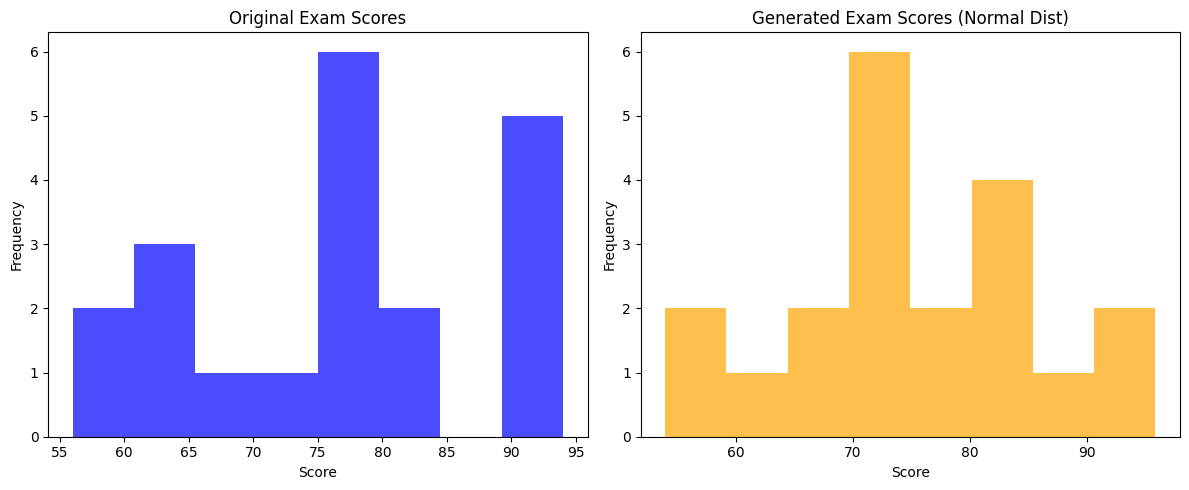

In [4]:
# 2. Random Number Generation
np.random.seed(42)
generated_scores = np.random.normal(mean_score, std_score, size=20)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(scores, bins=8, alpha=0.7, color='blue')
plt.title('Original Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(generated_scores, bins=8, alpha=0.7, color='orange')
plt.title('Generated Exam Scores (Normal Dist)')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [5]:
# 3. Monte Carlo Simulation
sim_samples = np.random.normal(mean_score, std_score, 100000)
prob_75_or_more = np.mean(sim_samples >= 75)

print(f"\n3. Monte Carlo Simulation:")
print(f"Estimated Probability P(Score >= 75): {prob_75_or_more:.4f}")


3. Monte Carlo Simulation:
Estimated Probability P(Score >= 75): 0.5637



4. Hypothesis Testing:
Null hypothesis mean = 70
t-statistic = 2.5782
p-value = 0.0184
Reject the null hypothesis at 0.05 significance level.


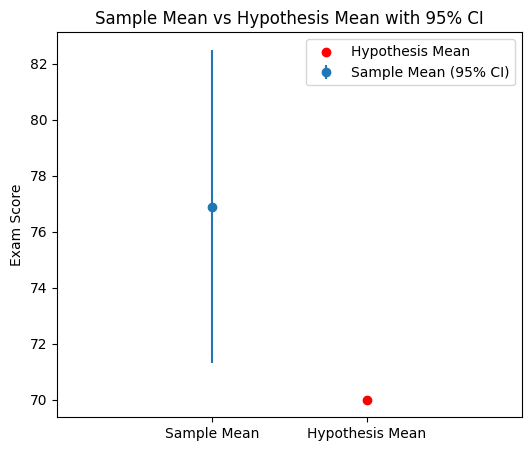


Unique Interpretation:
The t-test checks if the observed average score differs significantly from your personalized hypothesis mean.
Rejecting H0 means evidence suggests the average score is not equal to the hypothesis mean.
Failing to reject H0 suggests insufficient evidence to conclude difference.


In [7]:
# 4. Hypothesis Testing: one-sample t-test
# Your unique null hypothesis mean:
# Replace 'your_student_id_last3' with your actual last 3 digits
your_student_id_last3 = 120  # Example placeholder
hypothesis_mean = (your_student_id_last3 % 50) + 50

print(f"\n4. Hypothesis Testing:")
print(f"Null hypothesis mean = {hypothesis_mean}")

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(scores, hypothesis_mean)

print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis at 0.05 significance level.")
else:
    print("Fail to reject the null hypothesis at 0.05 significance level.")

# Visualization of mean and hypothesized mean with 95% CI
n = len(scores)
se = std_score / np.sqrt(n)
margin = stats.t.ppf(1 - alpha/2, n - 1) * se
ci_lower = mean_score - margin
ci_upper = mean_score + margin

plt.figure(figsize=(6,5))
plt.errorbar(1, mean_score, yerr=[[mean_score - ci_lower], [ci_upper - mean_score]], fmt='o', label='Sample Mean (95% CI)')
plt.scatter(1.5, hypothesis_mean, color='red', label='Hypothesis Mean')
plt.xlim(0.5, 2)
plt.xticks([1, 1.5], ['Sample Mean', 'Hypothesis Mean'])
plt.ylabel('Exam Score')
plt.title('Sample Mean vs Hypothesis Mean with 95% CI')
plt.legend()
plt.show()

print("\nUnique Interpretation:")
print("The t-test checks if the observed average score differs significantly from your personalized hypothesis mean.")
print("Rejecting H0 means evidence suggests the average score is not equal to the hypothesis mean.")
print("Failing to reject H0 suggests insufficient evidence to conclude difference.")